# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [4]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [5]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [6]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\Users\palak\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


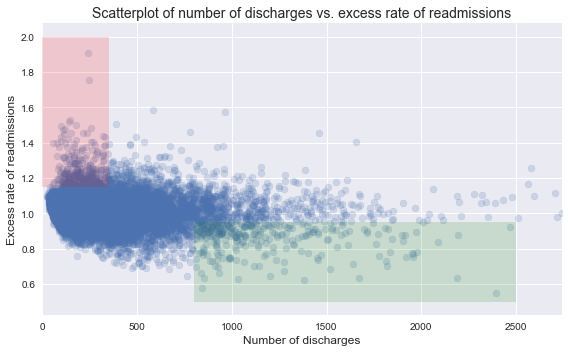

In [7]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [ ]:
# Your turn

In [8]:
from scipy import stats
import seaborn as sns


In [9]:
df=pd.read_csv('data/cms_hospital_readmissions.csv')

# Cleaning

In [10]:
hospital_read_df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,FROEDTERT MEMORIAL LUTHERAN HOSPITAL,520177,WI,READM-30-HIP-KNEE-HRRP,242,NaN,1.9095,10.8,5.6,38.0,07/01/2010,06/30/2013
1,PROVIDENCE HOSPITAL,90006,DC,READM-30-HIP-KNEE-HRRP,247,NaN,1.7521,9.2,5.3,33.0,07/01/2010,06/30/2013
2,BEAUFORT COUNTY MEMORIAL HOSPITAL,420067,SC,READM-30-HIP-KNEE-HRRP,586,NaN,1.5836,7.6,4.8,53.0,07/01/2010,06/30/2013
3,ADVOCATE CHRIST HOSPITAL & MEDICAL CENTER,140208,IL,READM-30-HIP-KNEE-HRRP,965,NaN,1.5760,9.0,5.7,95.0,07/01/2010,06/30/2013
4,BRAZOSPORT REGIONAL HEALTH SYSTEM,450072,TX,READM-30-HIP-KNEE-HRRP,149,NaN,1.5308,8.2,5.4,20.0,07/01/2010,06/30/2013


In [11]:
df = pd.read_csv('data/cms_hospital_readmissions.csv')
df = df[df['Number of Discharges'] != 'Not Available']
df = df[df['Number of Discharges'].astype(int) > 0]
df['Number of Discharges'] = df['Number of Discharges'].astype(int)

set(df['Measure Name'])

{'READM-30-AMI-HRRP',
 'READM-30-COPD-HRRP',
 'READM-30-HF-HRRP',
 'READM-30-HIP-KNEE-HRRP',
 'READM-30-PN-HRRP'}

**Since we're interested in heart attack, heart failure, and pneumonia, we're primarily interested in the following fields:
acute myocardial infarction (AMI), heart failure (HF), and pneumonia (PN), which are indicated by measure names
READM-30-AMI-HRRP, READM-30-HF-HRRP, and READM-30-PN-HRRP.**

In [12]:
df = df[(df['Measure Name'] == 'READM-30-AMI-HRRP') |
        (df['Measure Name'] == 'READM-30-HF-HRRP') |
        (df['Measure Name'] == 'READM-30-PN-HRRP')]

## A. Initial observations based on the plot above
### _Overall, rate of readmissions is trending down with increasing number of discharges_

**Response:** Without evidence, such as a linear regression, this is not at all evident. Since there are five different measures in the data set, there may be differences between readmission rates for distinct measures, which is not accounted for by the above plot. Also, the plot suggests that a linear model may be a poor explanation of variance in excess readmission ratio (which we can measure by calculating $r^2$).

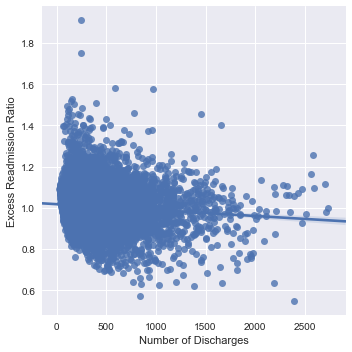

In [13]:
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])
data = pd.DataFrame([x,y], index=['Number of Discharges', 'Excess Readmission Ratio']).transpose()

g = sns.lmplot(x='Number of Discharges', y='Excess Readmission Ratio', data=data)

In [14]:
slope, intercept, rvalue, pvalue, stderr = stats.linregress(x, y)
print('Slope:      {: .2e}\n'
      'Intercept:  {: .2e}\n'
      'r-squared:  {: .2e}\n'
      'p-value:    {: .2e}\n'
      'Std. Error: {: .2e}\n'.format(slope, intercept, rvalue**2, pvalue, stderr))

Slope:      -2.86e-05
Intercept:   1.02e+00
r-squared:   8.67e-03
p-value:     1.50e-23
Std. Error:  2.85e-06



Note that the value of the coefficent of determination $r^2$ is very small, and thus much of the variance in excess readmission ratio is not explained by the number of discharges. However, due to how small the $p$-value is, we can comfortably reject the null hypothesis that the best fit regression line has slope zero.

We next investigate each measure independently.

In [15]:
set(df['Measure Name'])

{'READM-30-AMI-HRRP', 'READM-30-HF-HRRP', 'READM-30-PN-HRRP'}

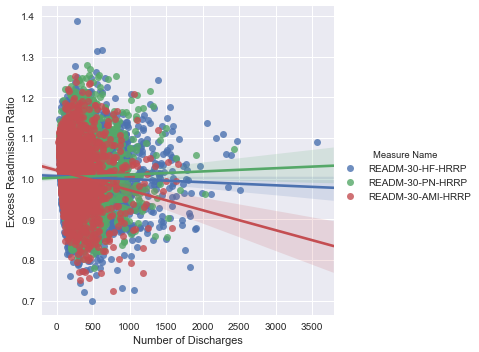

In [16]:
x, y, hue = 'Number of Discharges', 'Excess Readmission Ratio', 'Measure Name'
g = sns.lmplot(x=x, y=y, hue=hue, data=df[[x,y, hue]])

For each of the three measures, we see that only for AMI is there a clear correlation between number of discharges and excess readmission ratio. We explore that further next:

In [17]:
df_ami = df[df['Measure Name'] == 'READM-30-AMI-HRRP']
df_hf = df[df['Measure Name'] == 'READM-30-HF-HRRP']
df_pn = df[df['Measure Name'] == 'READM-30-PN-HRRP']

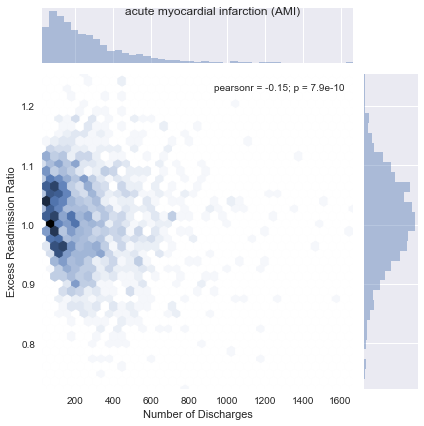

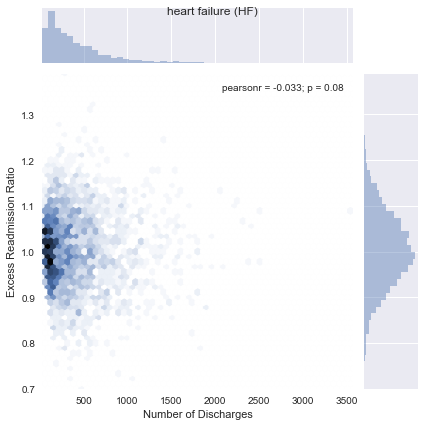

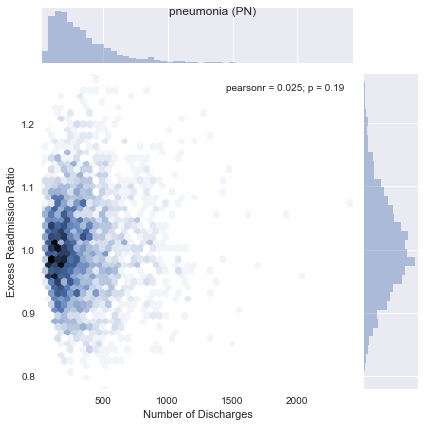

In [18]:
ami = sns.jointplot(x=x, y=y, data=df_ami[[x,y]], kind="hex")
ami.fig.suptitle('acute myocardial infarction (AMI)')
hf = sns.jointplot(x=x, y=y, data=df_hf[[x,y]], kind="hex")
hf.fig.suptitle('heart failure (HF)')
pn = sns.jointplot(x=x, y=y, data=df_pn[[x,y]], kind="hex")
pn.fig.suptitle('pneumonia (PN)')

Note that the scales in the above charts differ.

Above `pearsonr` refers to the sample correlation coefficient, and the $p$-value tests the null hypothesis that the true correlation between the variables is zero. Only in the case of acute myocardial infarction (AMI) is the p-value low enough to reject the null hypothesis.

### _With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)_
**Response:** Unclear; it seems that there are significantly more hospitals with lower number of discharges, and so this calculation should be relative the proportion of smaller hospitals. Also, with a lower number of discharges, the statistical power of the measures are hard to evaluate without access to the standard error or confidence intervals.

### _With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green)_ 

**Response:** Again unclear, this suffers from the same issues in the previous point. Furthermore without taking a weighted sum of patients treated, it's difficult to compare the magnitude of effect in a sensible manner.

In order to analyze these claims, we'll calculate odds ratios that a patient will attend a hospital with a high extra readmission ratio (greater then 1.15) against attending a hospital with a low extra readmission ratio (less then 0.9). We'll consider this for patients at small (less then 350 discharges) and large (greater then 800 discharges) hospitals.

In [19]:
print('Number of hospitals with x <= 350 and y >= 1.15: {}'.format(len(df[(df[x] <= 350) & (df[y] >= 1.15)][x])))
print('Number of patients treated: {}'.format(sum(df[(df[x] <= 350) & (df[y] >= 1.15)][x])))
print('Number of hospitals with x <= 350 and y <= .95: {}'.format(len(df[(df[x] <= 350) & (df[y] >= .95)][x])))
print('Number of patients treated: {}'.format(sum(df[(df[x] <= 350) & (df[y] >= .95)][x])))
a = len(df[(df[x] <= 350) & (df[y] >= 1.15)])/ len(df[(df[x] <= 350) & (df[y] <= .95)])
print('Odds of patients treated: {}'.format(a))

Number of hospitals with x <= 350 and y >= 1.15: 133
Number of patients treated: 29654
Number of hospitals with x <= 350 and y <= .95: 3715
Number of patients treated: 656573
Odds of patients treated: 0.13326653306613226


In [20]:
print('Number of hospitals with x >= 800 and y >= 1.15: {}'.format(len(df[(df[x] >= 800) & (df[y] >= 1.15)][x])))
print('Number of patients treated: {}'.format(sum(df[(df[x] >= 800) & (df[y] >= 1.15)][x])))
print('Number of hospitals with x >= 800 and y <= .95: {}'.format(len(df[(df[x] >= 800) & (df[y] <= .95)][x])))
print('Number of patients treated: {}'.format(sum(df[(df[x] >= 800) & (df[y] <= .95)][x])))
b = len(df[(df[x] >= 800) & (df[y] >= 1.15)])/ len(df[(df[x] >= 800) & (df[y] <= .95)])
print('Odds of patients treated: {}'.format(b))

Number of hospitals with x >= 800 and y >= 1.15: 21
Number of patients treated: 23154
Number of hospitals with x >= 800 and y <= .95: 150
Number of patients treated: 162139
Odds of patients treated: 0.14


It's unclear what the original observations were attempting to claim: perhaps they noticed that there were 150 hospitals in the green shaded area, compared to 133 in the red shaded area?

However, when taking into accout the size of hospital, the odds ratio paints a different observation: the odds of a good outcome compared to a bad outcome after choosing a small hospital are bettern then the odds after choosing a large hospital.

In [21]:
print('Odds ratio: {}'.format(a/b))

Odds ratio: 0.9519038076152303


We note that this could be better analyzed by considering the extra readmission ratio as well; however it is unclear to me (without significantly more data) how to properly consider those weights, in particular since it is a derived statistic.

## B. Statistics
### _In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1_
### _In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1_

**Response:** This is not surprising, given that the above regression analysis has a negative slope ($m = -2.86 \cdot 10^{-5}$), which is essentially a measure of the mean excess readmission rate relative to the number of discharges.


## C. Conclusions
### _There is a significant correlation between hospital capacity (number of discharges) and readmission rates._ 
**Response:** This is highly suspect, and not at all clear from the above plot. However, our analysis does agree that there is a statistically significant correlation between hospital capacity and readmission rates, in particular with respect to AMI.  However, the coefficent of determination in all three measures (AMI, HF, PN) is small, and other factors may play a larger role in understanding the variation.

### _Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions._
**Response:**  It is unclear why number of discharges is used as a proxy for hospital size; as it is only a count of the number of discharges between 1 July 2012 through 30 June 2015. A small hospital in an urban center may have a high number of discharges due to specialization in treatment, whereas a similarly sized hospital in a rural location might have a small number of discharges.

## D. Regulatory policy recommendations**
### _Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation._

**Response:** In the case of AMI, this may definitely be true. But it's not clear that HF and PN follow the same trend.

### _Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges._

**Response:** Disregaring the statistical analysis, this suggestion is deeply problematic for a variety of political reasons, such as access to treatment. However, in light of our analysis, it is not clear that there is significant benefit to categorically moving away from smaller hospitals. In particular recall that 

    Number of hospitals with x >= 800 and y >= 1.15: 21
    Number of patients treated: 23154

while

    Number of hospitals with x <= 350 and y >= 1.15: 133
    Number of patients treated: 29654
    
where $x$ measured capacity and $y$ excess readmission ratio. It may be more productive and cost effective to improve on the 21 large hospitals, rather then consolidating the 133 smaller hospitals.

# Summary

Although the relation between the rate of readmissions and number of discharges is statistically significant, with the rate of readmission trending down as number of discharges increases, the low coefficient of determination $r^2$ suggests that this may not be the most influential factor. Hence one should be hesitant to suggest changes based on categorical factors such as size.

There is statistically significant evidence that smaller hospitals are more likely to have higher excess readmission ratios when dealing with AMI. Review of the differences in treatment between small and large hospitals on this measure would be recommended.

Finally, it would be helpful to have a power analysis of the excess readmission ratio; each of these measures should have a confidence interval whose size is related to the number of discharges. In particular, there is a difference comparing the excess readmission ratio with a fixed number (1.15 or 0.9) as there is room for error.